# Notebook to Calculate RCAV

In [39]:
import os
import shutil
import zipfile
import tarfile
import urllib
import requests
from pathlib import Path
from tqdm import tqdm
import h5py as h5

In [15]:
import numpy as np
import awkward as ak
import uproot
import vector
vector.register_awkward()

In [16]:
import matplotlib.pyplot as plt

In [38]:
import torch

/Users/billyli/miniforge_x86_new/envs/weaver/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
root_dir = Path("/Users/billyli/scope/JetClass/minimal")
list(root_dir.glob('*.root'))

[PosixPath('/Users/billyli/scope/JetClass/minimal/HToCC_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/WToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToBB_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToGG_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW2Q1L_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBarLep_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBar_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZJetsToNuNu_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW4Q_120.root')]

In [18]:
f = list(root_dir.glob('*.root'))[0]
f.name.split('_')

['HToCC', '120.root']

In [19]:
example_file_path = "/Users/billyli/scope/JetClass/minimal/HtoBB_120.root"

## Get Jet Mass from Root Files

In [20]:
def feature_to_numpy(tree, feature):
    return tree[feature].arrays().to_numpy().astype(float)

In [74]:
jet_sdmass = {}
for f in root_dir.glob('*.root'):
    process = f.name.split('_')[0]
    tree = uproot.open(f)['tree']
    jet_sdmass[process] = feature_to_numpy(tree, 'jet_sdmass')

In [22]:
jet_sdmass

{'HToCC': array([115.258255  , 111.84100342, 125.46985626, ..., 128.40882874,
        135.57939148, 141.51844788]),
 'WToQQ': array([72.61198425, 89.07801056, 76.53503418, ..., 76.12161255,
        79.85035706, 83.38143921]),
 'ZToQQ': array([ 84.99334717,  85.89722443,  80.36242676, ...,  94.44278717,
         72.22348022, 111.22592163]),
 'HToBB': array([236.60557556, 244.01182556, 113.34453583, ..., 125.35571289,
         45.36766052, 131.21665955]),
 'HToGG': array([122.22318268, 118.07779694, 120.23336029, ..., 120.01646423,
        119.24666595, 154.14793396]),
 'HToWW2Q1L': array([5.11340215e-04, 3.89420967e+01, 9.82005386e+01, ...,
        1.09459663e+02, 7.13239441e+01, 4.06601868e+01]),
 'TTBarLep': array([102.27770996,  74.19477081, 113.57976532, ..., 107.22871399,
        129.00959778, 142.58552551]),
 'TTBar': array([149.57839966,  80.48643494, 171.76864624, ..., 166.25233459,
        176.77210999, 178.86199951]),
 'ZJetsToNuNu': array([ 4.84817028,  7.31240273, 54.5573539

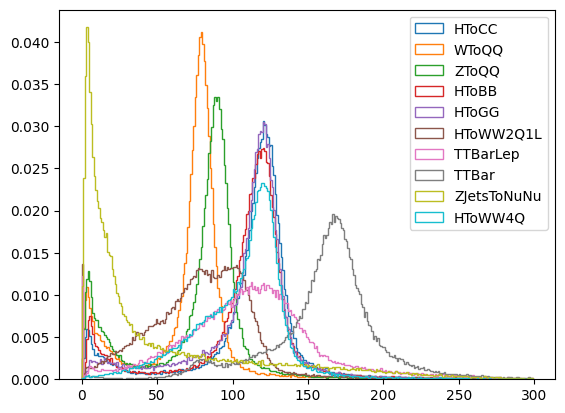

In [31]:
for k, v in jet_sdmass.items():
    plt.hist(v, label=k, bins=np.arange(0, 300, 1), density=True, histtype='step')
plt.legend()

(array([1.10637271e-02, 2.38171870e-02, 3.59269392e-02, 4.17203090e-02,
        4.00305761e-02, 3.39958159e-02, 3.02844384e-02, 2.63216125e-02,
        2.40686353e-02, 2.24291921e-02, 2.11015449e-02, 2.03572578e-02,
        1.90899582e-02, 1.85971194e-02, 1.76617316e-02, 1.68068072e-02,
        1.73298198e-02, 1.51371902e-02, 1.47650467e-02, 1.46544094e-02,
        1.30551979e-02, 1.22907950e-02, 1.13352913e-02, 1.02590924e-02,
        9.82660122e-03, 8.98173479e-03, 8.72022852e-03, 7.71443515e-03,
        7.50321854e-03, 7.05061152e-03, 6.78910525e-03, 6.42701963e-03,
        6.51754104e-03, 5.66261667e-03, 5.73302221e-03, 5.27035726e-03,
        5.28041519e-03, 5.50168973e-03, 4.74734471e-03, 4.78757644e-03,
        4.99879305e-03, 4.19415835e-03, 4.13381075e-03, 4.09357902e-03,
        4.25450595e-03, 3.99299968e-03, 4.34502736e-03, 3.70131960e-03,
        3.81195687e-03, 3.69126167e-03, 4.04328935e-03, 3.95276794e-03,
        3.56050853e-03, 3.67114580e-03, 3.52027679e-03, 3.339233

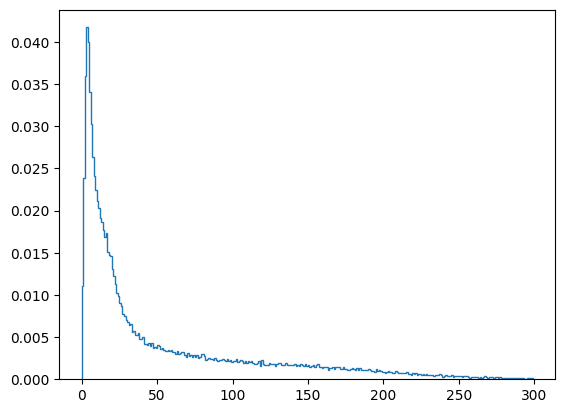

In [35]:
plt.hist(jet_sdmass['ZJetsToNuNu'], label='ZJetsToNuNu', bins=np.arange(0, 300, 1), density=True, histtype='step')

In [34]:
jet_sdmass.keys()

dict_keys(['HToCC', 'WToQQ', 'ZToQQ', 'HToBB', 'HToGG', 'HToWW2Q1L', 'TTBarLep', 'TTBar', 'ZJetsToNuNu', 'HToWW4Q'])

In [36]:
len(jet_sdmass['ZJetsToNuNu'])

100000

## Load the last class token

In [42]:
file = h5.File('/Users/billyli/scope/weaver-core/hidden_states_out.h5', 'r')

In [ ]:
X = np.array(file['hidden_11'][:]).squeeze(1)
print(X.shape, X.mean(axis=1), X.std(axis=1))

(1000, 128) [-9.45601799e-03  1.22203380e-02  2.84307487e-02 -1.99082382e-02
  1.59450993e-03 -8.61203298e-03  3.56976651e-02 -6.01580217e-02
  3.66006047e-03  1.55064277e-02  2.67313682e-02  1.27520561e-02
  1.56713985e-02 -4.85546142e-03  5.21128252e-03 -1.01630501e-02
  1.13054141e-02  3.21518071e-03  2.64167786e-03  1.99672207e-02
 -1.44301299e-02  1.17685907e-02  2.50978023e-03  2.76757851e-02
 -3.79446223e-02  7.55316205e-03 -1.36793405e-02 -2.47236043e-02
  2.39202231e-02  1.93915367e-02  2.12223455e-03 -1.47989877e-02
  1.40588805e-02  2.20588520e-02  3.82669196e-02  4.26998176e-02
  2.18457654e-02 -6.01116568e-04  1.92084685e-02  2.66708434e-02
  2.42214873e-02  1.42172575e-02 -7.81060662e-03  2.43043751e-02
  2.30170004e-02  1.13242939e-02 -2.13183761e-02 -6.43969513e-03
  9.16651636e-03  1.90542191e-02  8.49464536e-03  3.17084827e-02
  1.90678015e-02 -1.84839740e-02 -1.05894022e-02 -1.18591674e-02
 -2.27166638e-02  1.78552717e-02 -6.74650073e-03  1.60766132e-02
 -2.64206007e

## Linear Regression to get the coefficient vector

In [75]:
jet_sdmass_all_list = list(jet_sdmass.values())
jet_sdmass_all_list = [x[..., np.newaxis] for x in jet_sdmass_all_list]
jet_sdmass_all = np.concatenate(jet_sdmass_all_list, axis=1)
y_tensor = torch.tensor(jet_sdmass_all)

In [61]:
X_tensor = torch.tensor(X)
X_tensor = torch.cat([X_tensor, torch.ones(X_tensor.size(0), 1)], dim=1)

/Users/billyli/miniforge_x86_new/envs/weaver/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [76]:
w_tensor = torch.linalg.pinv(X_tensor.T @ X_tensor) @ (X_tensor.T @ y_tensor)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (130x1000 and 100000x10)

In [65]:
X_tensor.shape

torch.Size([1000, 130])

In [68]:
list(jet_sdmass.values())

[array([115.258255  , 111.84100342, 125.46985626, ..., 128.40882874,
        135.57939148, 141.51844788]),
 array([72.61198425, 89.07801056, 76.53503418, ..., 76.12161255,
        79.85035706, 83.38143921]),
 array([ 84.99334717,  85.89722443,  80.36242676, ...,  94.44278717,
         72.22348022, 111.22592163]),
 array([236.60557556, 244.01182556, 113.34453583, ..., 125.35571289,
         45.36766052, 131.21665955]),
 array([122.22318268, 118.07779694, 120.23336029, ..., 120.01646423,
        119.24666595, 154.14793396]),
 array([5.11340215e-04, 3.89420967e+01, 9.82005386e+01, ...,
        1.09459663e+02, 7.13239441e+01, 4.06601868e+01]),
 array([102.27770996,  74.19477081, 113.57976532, ..., 107.22871399,
        129.00959778, 142.58552551]),
 array([149.57839966,  80.48643494, 171.76864624, ..., 166.25233459,
        176.77210999, 178.86199951]),
 array([ 4.84817028,  7.31240273, 54.55735397, ..., 18.11897659,
         0.13957   ,  3.62823057]),
 array([154.37501526,  92.24372864, 1

In [78]:
len(jet_sdmass_all_list)

10